# Guia 1

## Ejercicio 1

Implemente rutinas que permitan el entrenamiento y prueba de un perceptrón simple con una cantidad variable de entradas. Se deben tener en cuenta las siguientes capacidades:

- lectura de los patrones de entrenamiento (entradas y salidas) desde un archivo en formato texto separado por comas,
- selección del criterio de finalización del entrenmiento y el número máximo de épocas,
- selección de la tasa de aprendizaje,
- prueba del perceptrón entrenado mediante archivos de texto con el mismo formato separado por comas.

Una vez obtenido dicho programa, pruébelo en la resolución del problema `OR`, utilizando los archivos de patrones `OR_trn.csv` y `OR_tst.csv` para el entrenamiento y la prueba, respectivamente. Los patrones que se proveen en estos archivos fueron generados a partir de los puntos $(1,1)$, $(1,-1)$, $(-1,1)$ y $(-1,-1)$ con pequeñas desviaciones aleatorias ($<5%$) en torno a éstos. Recuerde que para que la prueba tenga validez se deben utilizar patrones nunca presentados en el entrenamiento, para ésto se dispone de dos archivos de datos diferentes.

# Solución

Se provee la clase `Perceptron` en `Perceptron.py`:

- Constructor `Perceptron( N, rate, maxEpocas, funcionActivacion, bias)`
  - `N`: número de entradas (sin contar umbral/bias).
  - `rate`: tasa de aprendizaje.
  - `maxEpocas`: número máximo de épocas en el entrenamiento.
  - `funcionActivacion`: función de activación.
  - `bias` (opcional): valor umbral inicial.
- 

In [1]:
import os
import numpy as np
import Perceptron

def cargarCSV(csvRelativePath, delimeter = ','):
    this_folder = os.path.abspath('') 
    fullPath = os.path.join(this_folder, csvRelativePath)
    return np.loadtxt(fullPath, dtype=float, delimiter=delimeter)

def funcionActivacion(v):
    return 1 if v >= 0 else -1

# inicializar random
rng = np.random.default_rng()
# ===== PARAMETROS =====
# Taza de aprendizaje
aprRate = 0.1
# Cantidad maxima de epocas
epocas = 100
# Tolerancia al error
maxErr = 0.1

# ===== LEER ARCHIVOS =====
# Archivo de training
trainFile = cargarCSV('OR_trn.csv')
# Entradas
x = trainFile[:,:-1]
# Salidas esperadas
yd = trainFile[:,-1]

perceptron = Perceptron.Perceptron(
    N=x.shape[1],
    rate=aprRate,
    maxEpocas=epocas,
    funcionActivacion=funcionActivacion)

error = perceptron.entrenar(x,yd,maxErr)

print(f"Tasa de error en training: {error}")

[-0.9801 -1.0187 -1.    ]
Tasa de error en training: 0.0


# Testear perceptron

Tasa de error en testing: 0.0


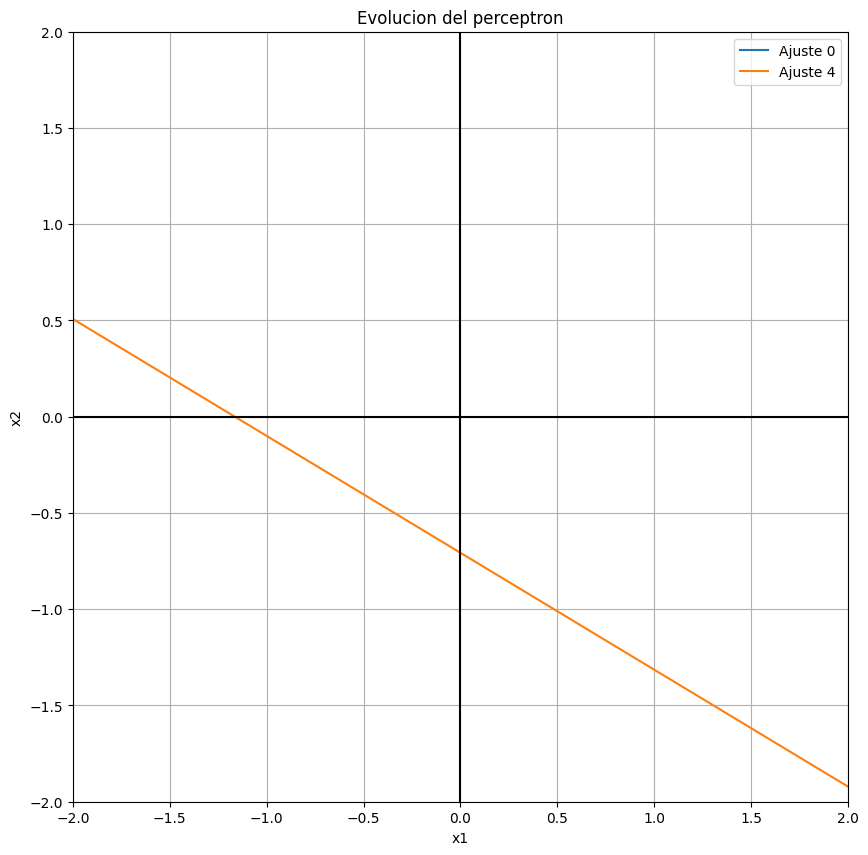

In [2]:
# ===== LEER ARCHIVOS =====
# Archivo de testing
testFile = cargarCSV('OR_tst.csv')
# Entradas
x = testFile[:,:-1]
# Salidas esperadas
yd = testFile[:,-1]

error = perceptron.test(x,yd)

print(f"Tasa de error en testing: {error}")

perceptron.graphTraining()

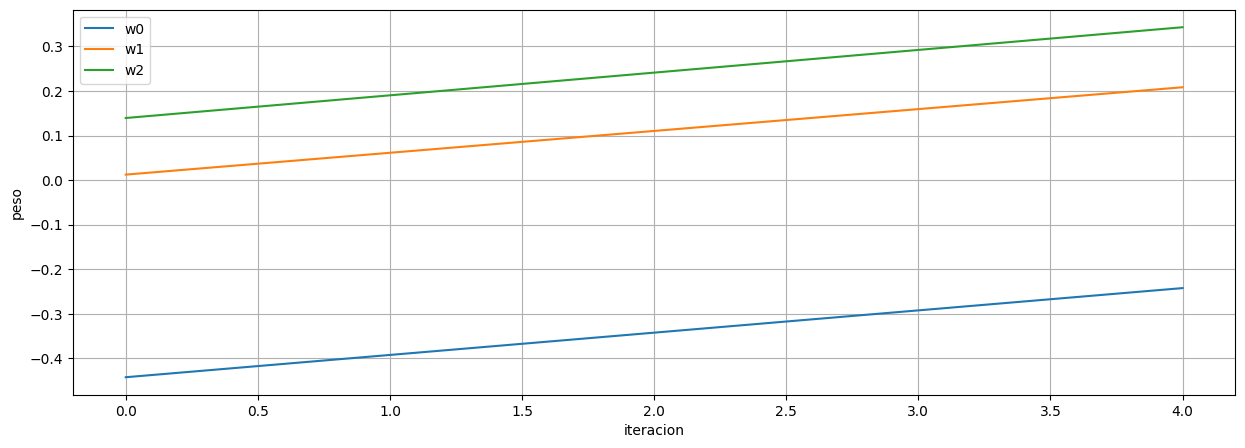

In [3]:
perceptron.graphWeightEvol()